# MIE1624 Assignment3

## 1. Data collection and cleaning

In recent years, with the development of data science, more and more people have started to pay attention to this field. Hence, more attention should also be paid to this field. In this report, I aimed to design a course curriculum for a new program related to data science, which would help students to obtain necessary skills to pursue a successful career. All analyses in this study are based on the data posted on http://indeed.com web-portal

### Adapt provided web-scraping code

Since this program is mainly for students in University of Toronto, I chose to focus on the data scientist position in USA. Hence I web-scraped the data from http://indeed.com web-portal and created a new dataset by removing the duplicated data.

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

#!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 4.0 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver

driver_path = "/usr/bin/chromedriver"

driver = webdriver.Chrome(executable_path=driver_path)

/var/folders/7x/mxtwtdg12f72pjshjy6yf0440000gn/T/ipykernel_63198/3465359799.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [ ]:
## Enter a job position
position = "data scientist"
## Enter a location (City, State or Zip or remote)
locations = "USA"

def get_url(position, location):
    url_template = "https://www.indeed.com/jobs?q={}&l={}"
    url = url_template.format(position, location)
    return url

url = get_url(position, locations)
dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])

In [ ]:
## Number of postings to scrape
postings = 1500

jn=0
for i in range(0, postings, 10):
    driver.get(url + "&start=" + str(i))
    driver.implicitly_wait(3)

    jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')

    for job in jobs:
        result_html = job.get_attribute('innerHTML')
        soup = BeautifulSoup(result_html, 'html.parser')

        jn += 1

        liens = job.find_elements(By.TAG_NAME, "a")
        links = liens[0].get_attribute("href")

        title = soup.select('.jobTitle')[0].get_text().strip()
        company = soup.select('.companyName')[0].get_text().strip()
        location = soup.select('.companyLocation')[0].get_text().strip()
        try:
            salary = soup.select('.salary-snippet-container')[0].get_text().strip()
        except:
            salary = 'NaN'
        try:
            rating = soup.select('.ratingNumber')[0].get_text().strip()
        except:
            rating = 'NaN'
        try:
            date = soup.select('.date')[0].get_text().strip()
        except:
            date = 'NaN'
        try:
            description = soup.select('.job-snippet')[0].get_text().strip()
        except:
            description = ''

        dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
                                          "Company": company,
                                          'Location': location,
                                          'Rating': rating,
                                          'Date': date,
                                          "Salary": salary,
                                          "Description": description,
                                          "Links": links}])], ignore_index=True)
        print("Job number {0:4d} added - {1:s}".format(jn,title))

Job number    1 added - Applied Machine Learning Scientist - Data Technologies
Job number    2 added - Data Scientist
Job number    3 added - Sr. Supply Chain Data Scientist
Job number    4 added - Data Engineer
Job number    5 added - Data Scientist II
Job number    6 added - Research Engineer (Software/Data Science)
Job number    7 added - Lead, Data Scientist Regulatory Intelligence and Policy Research (REMOTE)
Job number    8 added - Data Scientist
Job number    9 added - Senior Data Analyst
Job number   10 added - Senior Data Analyst
Job number   11 added - Data Scientist
Job number   12 added - Data Scientist
Job number   13 added - Sr. Data Scientist
Job number   14 added - Data Scientist
Job number   15 added - Data Scientist
Job number   16 added - Data Scientist
Job number   17 added - Data Scientist
Job number   18 added - Data Scientist
Job number   19 added - Data Scientist-Health
Job number   20 added - Data Scientist
Job number   21 added - Senior Data Scientist
Job numb

Job number  180 added - Data Scientist
Job number  181 added - Data Scientist - Computer Vision
Job number  182 added - Data Scientist
Job number  183 added - Senior Data Scientist
Job number  184 added - Senior Data Scientist
Job number  185 added - Sr Data Scientist
Job number  186 added - Data Scientist
Job number  187 added - DATA SCIENTIST
Job number  188 added - Data Scientist - Global Decision Science
Job number  189 added - Senior Data Scientist (CBP Clearance)
Job number  190 added - Uncapped Games - Data Scientist
Job number  191 added - Senior Data Scientist
Job number  192 added - Data Scientist (Mid Level)
Job number  193 added - Data Scientist
Job number  194 added - Associate Data Scientist (Remote)
Job number  195 added - AI Machine Learning Validation Engineer
Job number  196 added - Marketing Data Scientist
Job number  197 added - Senior Data Scientist - Growth
Job number  198 added - Data Scientist
Job number  199 added - Senior Data Analyst
Job number  200 added - D

Job number  355 added - Data scientist
Job number  356 added - Senior Data Scientist
Job number  357 added - Senior Data Scientist | Remote-US
Job number  358 added - AI Machine Learning Validation Engineer
Job number  359 added - Senior Data Scientist
Job number  360 added - Research Scientist, Artificial intelligence in drug discovery
Job number  361 added - Marketing Data Scientist
Job number  362 added - Data Scientist
Job number  363 added - Data Scientist Senior (TS/SCI)-Northern, VA
Job number  364 added - Staff Data Scientist - Revenue Cycle
Job number  365 added - Embedded BI Data Scientist SIBU510
Job number  366 added - Data Scientist
Job number  367 added - Senior Data Scientist
Job number  368 added - Data Scientist CO-OP DOM Channing
Job number  369 added - Data Scientist
Job number  370 added - Data Scientist (Manufacturing)
Job number  371 added - Data Scientist - Vyasa
Job number  372 added - AI Machine Learning Validation Engineer
Job number  373 added - Data Scientis

Job number  519 added - Senior Data Analyst
Job number  520 added - Data Scientist
Job number  521 added - Data Scientist
Job number  522 added - Sr. Data Scientist II (Remote)
Job number  523 added - Data Analyst/Scientist
Job number  524 added - AI Machine Learning Validation Engineer
Job number  525 added - Data Scientist - Information Research
Job number  526 added - Data Scientist II
Job number  527 added - Data Scientist
Job number  528 added - Data Scientist - REMOTE
Job number  529 added - Data Scientist
Job number  530 added - Sr. Data Scientist
Job number  531 added - Data Scientist
Job number  532 added - Mathematical Scientist
Job number  533 added - Data Scientist
Job number  534 added - Junior Data Scientist
Job number  535 added - Senior Data Scientist
Job number  536 added - Senior Product Data Scientist
Job number  537 added - Data Scientist
Job number  538 added - Data Scientist I
Job number  539 added - Data Scientist
Job number  540 added - AI Machine Learning Valid

Job number  685 added - Data Scientist
Job number  686 added - Data Scientist (Mid)
Job number  687 added - Senior Manager, Pharmacometrician (PK Data Scientist)
Job number  688 added - Associate Data Scientist
Job number  689 added - Data Scientist, Sales & Success
Job number  690 added - AI Machine Learning Validation Engineer
Job number  691 added - Data Scientist_Computer Vision
Job number  692 added - Data Scientist, Systematic Global Macro
Job number  693 added - Senior Data Scientist
Job number  694 added - Senior Data Analyst
Job number  695 added - Data Scientist II
Job number  696 added - Data Scientist
Job number  697 added - Data Scientist / Data Analyst
Job number  698 added - Data Scientist
Job number  699 added - Data Scientist
Job number  700 added - AI Machine Learning Validation Engineer
Job number  701 added - Sr. Data Scientist
Job number  702 added - Data Scientist III
Job number  703 added - Data Scientist, Research and Applied
Job number  704 added - Data Enginee

Job number  851 added - Data Scientist
Job number  852 added - Data Scientist
Job number  853 added - Senior Data Analyst
Job number  854 added - Commercial Analytics Data Scientist
Job number  855 added - AI Machine Learning Validation Engineer
Job number  856 added - Data Scientist - Research (Hybrid)
Job number  857 added - Data Scientist
Job number  858 added - Data Scientist
Job number  859 added - PhD Residency - AI/ML - LLMs, NLP, Abstraction, Reasoning
Job number  860 added - Sr. Data Analyst
Job number  861 added - Senior Data Analyst
Job number  862 added - Senior Data Analyst
Job number  863 added - Data Scientist
Job number  864 added - Data Scientist
Job number  865 added - Sr. Data Scientist
Job number  866 added - Data Scientist
Job number  867 added - AI Machine Learning Validation Engineer
Job number  868 added - Data Scientist
Job number  869 added - Data Scientist
Job number  870 added - Data Scientist
Job number  871 added - Data Review Scientist- 1st Shift
Job numb

Job number 1017 added - Data Scientist Statistics
Job number 1018 added - Data Scientist
Job number 1019 added - AI Machine Learning Validation Engineer
Job number 1020 added - Data Analyst/Data Scientist
Job number 1021 added - Data Scientist I
Job number 1022 added - Data Scientist - Public Sector
Job number 1023 added - Data Scientist
Job number 1024 added - Data Scientist
Job number 1025 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1026 added - Data Scientist (Remote)
Job number 1027 added - Data Scientist
Job number 1028 added - Principal Data Scientist, New Initiatives
Job number 1029 added - Data Scientist
Job number 1030 added - Senior Data Scientist, Fraud Strategy
Job number 1031 added - Data Scientist
Job number 1032 added - Data Scientist Statistics
Job number 1033 added - Data Scientist
Job number 1034 added - AI Machine Learning Validation Engineer
Job number 1035 added - Data Analyst/Data Scientist
Job number 1

Job number 1176 added - Data Scientist (Remote)
Job number 1177 added - Data Scientist
Job number 1178 added - Principal Data Scientist, New Initiatives
Job number 1179 added - Data Scientist
Job number 1180 added - Senior Data Scientist, Fraud Strategy
Job number 1181 added - Data Scientist
Job number 1182 added - Data Scientist Statistics
Job number 1183 added - Data Scientist
Job number 1184 added - AI Machine Learning Validation Engineer
Job number 1185 added - Data Analyst/Data Scientist
Job number 1186 added - Data Scientist I
Job number 1187 added - Data Scientist - Public Sector
Job number 1188 added - Data Scientist
Job number 1189 added - Data Scientist
Job number 1190 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1191 added - Data Scientist (Remote)
Job number 1192 added - Data Scientist
Job number 1193 added - Principal Data Scientist, New Initiatives
Job number 1194 added - Data Scientist
Job number 1195 added - S

Job number 1333 added - Senior Data Scientist - Apple Maps Eval
Job number 1334 added - Senior Data Scientist
Job number 1335 added - Natural Language Processing Scientist
Job number 1336 added - Junior Data Scientist
Job number 1337 added - Data Scientist
Job number 1338 added - Data Analyst/Data Scientist
Job number 1339 added - Data Scientist - Public Sector
Job number 1340 added - Data Scientist
Job number 1341 added - Data Scientist
Job number 1342 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1343 added - Data Scientist (Remote)
Job number 1344 added - Data Scientist
Job number 1345 added - Data Scientist
Job number 1346 added - Data Scientist Statistics
Job number 1347 added - Principal Data Scientist, New Initiatives
Job number 1348 added - Data Scientist
Job number 1349 added - AI Machine Learning Validation Engineer
Job number 1350 added - Data Analyst/Data Scientist
Job number 1351 added - Data Scientist I
Job numbe

Job number 1490 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1491 added - Data Scientist (Remote)
Job number 1492 added - Data Scientist
Job number 1493 added - Principal Data Scientist, New Initiatives
Job number 1494 added - Data Scientist
Job number 1495 added - Senior Data Scientist, Fraud Strategy
Job number 1496 added - Data Scientist
Job number 1497 added - Data Scientist Statistics
Job number 1498 added - Data Scientist
Job number 1499 added - AI Machine Learning Validation Engineer
Job number 1500 added - Data Analyst/Data Scientist
Job number 1501 added - Data Scientist I
Job number 1502 added - Data Scientist - Public Sector
Job number 1503 added - Data Scientist
Job number 1504 added - Data Scientist
Job number 1505 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1506 added - Data Scientist (Remote)
Job number 1507 added - Data Scientist
Job number 1508 add

Job number 1648 added - Data Scientist
Job number 1649 added - AI Machine Learning Validation Engineer
Job number 1650 added - Data Analyst/Data Scientist
Job number 1651 added - Data Scientist I
Job number 1652 added - Data Scientist - Public Sector
Job number 1653 added - Data Scientist
Job number 1654 added - Data Scientist
Job number 1655 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1656 added - Data Scientist (Remote)
Job number 1657 added - Data Scientist
Job number 1658 added - Principal Data Scientist, New Initiatives
Job number 1659 added - Data Scientist
Job number 1660 added - Senior Data Scientist, Fraud Strategy
Job number 1661 added - Data Scientist
Job number 1662 added - Data Scientist Statistics
Job number 1663 added - Data Scientist
Job number 1664 added - AI Machine Learning Validation Engineer
Job number 1665 added - Data Analyst/Data Scientist
Job number 1666 added - Data Scientist I
Job number 1667 added

Job number 1809 added - Data Scientist
Job number 1810 added - Senior Data Scientist, Fraud Strategy
Job number 1811 added - Data Scientist
Job number 1812 added - Data Scientist Statistics
Job number 1813 added - Data Scientist
Job number 1814 added - AI Machine Learning Validation Engineer
Job number 1815 added - Data Analyst/Data Scientist
Job number 1816 added - Data Scientist I
Job number 1817 added - Data Scientist - Public Sector
Job number 1818 added - Data Scientist
Job number 1819 added - Data Scientist
Job number 1820 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1821 added - Data Scientist (Remote)
Job number 1822 added - Data Scientist
Job number 1823 added - Principal Data Scientist, New Initiatives
Job number 1824 added - Data Scientist
Job number 1825 added - Senior Data Scientist, Fraud Strategy
Job number 1826 added - Data Scientist
Job number 1827 added - Data Scientist Statistics
Job number 1828 added - Dat

Job number 1968 added - Data Analyst/Data Scientist
Job number 1969 added - Data Scientist - Public Sector
Job number 1970 added - Data Scientist
Job number 1971 added - Data Scientist
Job number 1972 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1973 added - Data Scientist (Remote)
Job number 1974 added - Data Scientist
Job number 1975 added - Data Scientist
Job number 1976 added - Data Scientist Statistics
Job number 1977 added - Principal Data Scientist, New Initiatives
Job number 1978 added - Data Scientist
Job number 1979 added - AI Machine Learning Validation Engineer
Job number 1980 added - Data Analyst/Data Scientist
Job number 1981 added - Data Scientist I
Job number 1982 added - Data Scientist - Public Sector
Job number 1983 added - Data Scientist
Job number 1984 added - Data Scientist
Job number 1985 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 1986 added 

Job number 2123 added - Data Scientist (Remote)
Job number 2124 added - Data Scientist
Job number 2125 added - Data Scientist
Job number 2126 added - Data Scientist Statistics
Job number 2127 added - Principal Data Scientist, New Initiatives
Job number 2128 added - Senior Data Scientist - Apple Maps Eval
Job number 2129 added - Senior Data Scientist
Job number 2130 added - Natural Language Processing Scientist
Job number 2131 added - Junior Data Scientist
Job number 2132 added - Data Scientist
Job number 2133 added - Data Analyst/Data Scientist
Job number 2134 added - Data Scientist - Public Sector
Job number 2135 added - Data Scientist
Job number 2136 added - Data Scientist
Job number 2137 added - Scientist I – Informatics & Data Science – Multiomic cellular atlases of primate brain
Job number 2138 added - Data Scientist (Remote)
Job number 2139 added - Data Scientist
Job number 2140 added - Data Scientist
Job number 2141 added - Data Scientist Statistics
Job number 2142 added - Princ

In [ ]:
driver.quit()

In [ ]:
Links_list = dataframe['Links'].tolist()
#Links_list
import random
import time

In [ ]:
driver = webdriver.Chrome(executable_path=driver_path)
descriptions=[]
for i in Links_list:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe['Descriptions'] = descriptions
print("scraping finished")

In [ ]:
driver.quit()

In [ ]:
# Convert the dataframe to a csv file
date = datetime.today().strftime('%Y-%m-%d')
dataframe.to_csv(date + "_" + position + "_" + locations + ".csv", index=False)

In [ ]:
# drop duplicates
df = pd.read_csv("2023-04-03_data scientist_USA.csv",encoding= 'unicode_escape')
df = df.drop_duplicates()

df.to_csv('A3_final.csv')

In [ ]:
data = pd.read_csv("A3_final.csv")
data = data.iloc[:,1:]
data.shape

(1032, 8)

## 2. Exploratory data analysis and feature engineering

### Engineer features by using n-grams

Feature engineering is the process of selecting and manipulating raw data to generate meaningful features for predictions or analysis. Since our task is to find the important skills related to the data scientist position and design the program. Thus, I used n-grams to select features. N-grams is a contiguous sequence of n items from a given text and could detect the provided words appearing in the sentence. Here I decide to separate each sentence into sequences of no more than 2 words since the length of each skill I extracted from the dataset is not greater than 2. After that, use a variation of the one-hot encoding technique called "dummy variables'' for important skills.

In [ ]:
skill_lists = ["python", "machine learning", "sql", "data analysis", "statistical analysis", "deep learning", "big data", "data visualization", "sas", "spss", "java","git","neural networks", "mathetics","statistics", "Algebra", "data mining",
               "communication skill", "project management","problem solving", "time management", "creativity", "leadership", "consulting", "decision making","presentation","story telling"]

In [ ]:
new_df = pd.DataFrame(columns= data.columns.tolist() + skill_lists)


In [ ]:
import re
def get_ngrams(text):
    #separte each sentence into contiguous sequences of no more 2 words
    ngrams = []
    words = re.findall(r'\b\w+\b', text.lower())
    for i in range(len(words)):
        for j in range(i+1, min(i+3, len(words)+1)):
            ngrams.append(' '.join(words[i:j]))
    return ngrams

def check_features(text):
    ngrams = get_ngrams(text)
    # loop all the skills in the sentence find if the contiguous sequence matches each skill
    feature_vec = [int(any(feature.lower() in ngram for ngram in ngrams)) for feature in skill_lists]
    return feature_vec

for i in range(data.shape[0]):
  job_description = str(data.loc[i, "Description"])
  check_skills = check_features(job_description)
  new_df.loc[i,new_df.columns] = data.loc[i, data.columns].tolist()+check_skills


In [ ]:
new_df.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,python,machine learning,...,communication skill,project management,problem solving,time management,creativity,leadership,consulting,decision making,presentation,story telling
0,Applied Machine Learning Scientist - Data Tech...,Bloomberg,"New York, NY 10261+1 location",3.9,PostedPosted 30+ days ago,"$160,000 - $250,000 a year",You will work alongside extraordinary talent t...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,Strategic Employment,"Boulder, CO 80301",NaN,PostedPosted 2 days ago,"$130,000 - $170,000 a year",Fully remote with occasional travel to headqua...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sr. Supply Chain Data Scientist,Honeywell,"Charlotte, NC 28202Â (Downtown Charlotte area)",NaN,EmployerActive 5 days ago,"$114,000 - $168,000 a year","Solid ability to carry out data cleansing, fea...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Data Engineer,Deloitte,"Rosslyn, VA 22209Â (Radnor-Ft Myer Heights are...",3.9,PostedPosted 30+ days ago,NaN,Our team supports all phases of analytic work ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist II,Vetegrity,"Fort Meade, MD",3.7,PostedPosted 30+ days ago,NaN,Assists others with drawing appropriate conclu...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualize key information

Each company may have their own sights on the needed skills. Hence it is crucial to gain sights to the counts of each skill. Based on the Figure1, we could observe that the demand for machine learning skills is the most. The next high demand skill is deep learning. This may indicate that more companies had switched their focus to Artificial Intelligence area rather than traditional data analysis


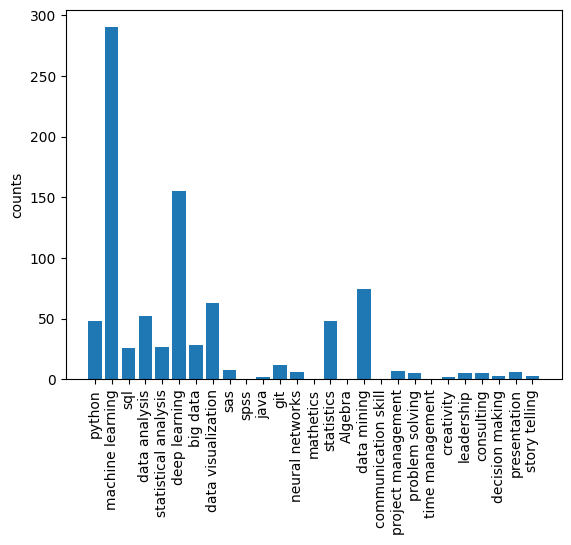

In [ ]:
import matplotlib.pyplot as plt

# figure 1
counts = new_df.iloc[:, 8:].sum()

plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), new_df.iloc[:, 8:].columns, rotation='vertical')
plt.ylabel("counts")
plt.show()

Besides the demand of skills, the average rating of each companies is also important. The result is shown as Figure 2. According to the plot, the companies demand "story telling" skills have the highest average rating score and none of the companies focus on "communication skill", "time management" and technical skills such as "mathematics" and "algebra"

In [ ]:
ratingdf = new_df[["Rating"] + skill_lists]
ratingdf = ratingdf.dropna(subset=['Rating'])

ratingdf = ratingdf.reset_index(drop=True)

In [ ]:
rating_skill = {}
for skill in skill_lists:
  rating_skill[skill] = 0

  count = 0
  for i in range(ratingdf.shape[0]):
    if ratingdf.loc[i,skill] == 1:
      rating_skill[skill] += ratingdf.loc[i, "Rating"]
      count += 1
  if count > 0:
    rating_skill[skill] /= count

In [ ]:
rating_skill

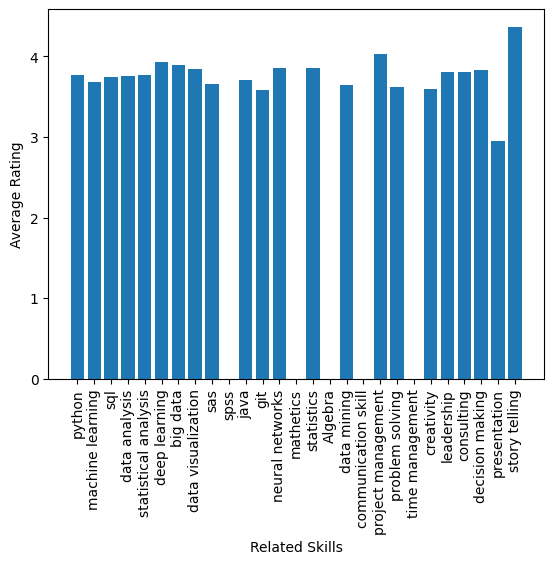

In [ ]:
#figure 2
plt.bar(rating_skill.keys(), rating_skill.values())
plt.xlabel('Related Skills')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.show()

## Hierarchical clustering implementation

Since each courses have to contain at least 3 topics, we have to cluster all the related skills. By generating distance matrix for technical skills, soft skills and all skills, we could conclude the relationships among these skills.

### Hierarchical clustering implementation for technical skills

In [ ]:
tech_skills = ["python", "machine learning", "sql", "data analysis", "statistical analysis", "deep learning", "big data", "data visualization", "sas", "spss", "java","git","neural networks", "mathetics","statistics", "Algebra", "data mining"]

techdf = new_df.loc[:, tech_skills]

In [ ]:
techdf.loc['count'] = techdf.sum(axis=0)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Machine Learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean


(1, 17544)

In [ ]:
# compute the distance matrix
n_skills = techdf.shape[1]
D = np.zeros((n_skills, n_skills))

nTemp = np.array(techdf.loc['count'])

for i in range(n_skills):
    for j in range(n_skills):
        D[i,j] = abs(nTemp[i]-nTemp[j])


In [ ]:
D #["python", "machine learning", "sql", "data analysis", "statistical analysis", "deep learning", "big data", "data visualization", "sas", "spss", "java",
#"git","neural networks", "mathetics","statistics", "Algebra", "data mining"]

array([[  0., 242.,  22.,   4.,  21., 107.,  20.,  15.,  40.,  48.,  46.,
         36.,  42.,  48.,   0.,  48.,  26.],
       [242.,   0., 264., 238., 263., 135., 262., 227., 282., 290., 288.,
        278., 284., 290., 242., 290., 216.],
       [ 22., 264.,   0.,  26.,   1., 129.,   2.,  37.,  18.,  26.,  24.,
         14.,  20.,  26.,  22.,  26.,  48.],
       [  4., 238.,  26.,   0.,  25., 103.,  24.,  11.,  44.,  52.,  50.,
         40.,  46.,  52.,   4.,  52.,  22.],
       [ 21., 263.,   1.,  25.,   0., 128.,   1.,  36.,  19.,  27.,  25.,
         15.,  21.,  27.,  21.,  27.,  47.],
       [107., 135., 129., 103., 128.,   0., 127.,  92., 147., 155., 153.,
        143., 149., 155., 107., 155.,  81.],
       [ 20., 262.,   2.,  24.,   1., 127.,   0.,  35.,  20.,  28.,  26.,
         16.,  22.,  28.,  20.,  28.,  46.],
       [ 15., 227.,  37.,  11.,  36.,  92.,  35.,   0.,  55.,  63.,  61.,
         51.,  57.,  63.,  15.,  63.,  11.],
       [ 40., 282.,  18.,  44.,  19., 147.,  20.

The distance matrix for technical skills is reasonable. For example, the skills "statistical analysis" are more relevant to "sql" and "big data”. These topics could be considered as one field. Hence by the distance matrix, I divided the technical skills into 5 topics.  
1. Basis : python, sql, statistics analysis
2. Visualization: data analysis, data mining, data visualization
3. Deep Learning: machine learning, deep learning, data mining
4. Mathematics: Mathematics, Algebra, spss
5. Big data: sql, big data, statistics analysis

### Hierarchical clustering implementation for soft skills

In [ ]:
soft_skills = ["communication skill", "project management","problem solving", "time management", "creativity", "leadership", "consulting", "decision making","presentation","story telling"]

softdf = new_df.loc[:, soft_skills]

In [ ]:
softdf.loc['count'] = softdf.sum(axis=0)

In [ ]:
# compute the distance matrix
n_skills_soft = softdf.shape[1]
D_soft = np.zeros((n_skills_soft, n_skills_soft))

nTemp_soft = np.array(softdf.loc['count'])

for i in range(n_skills_soft):
    for j in range(n_skills_soft):
        D_soft[i,j] = abs(nTemp_soft[i]-nTemp_soft[j])

In [ ]:
D_soft #["communication skill", "project management","problem solving", "time management", "creativity", "leadership", "consulting", "decision making","presentation","story telling"]

array([[0., 7., 5., 0., 2., 5., 5., 3., 6., 3.],
       [7., 0., 2., 7., 5., 2., 2., 4., 1., 4.],
       [5., 2., 0., 5., 3., 0., 0., 2., 1., 2.],
       [0., 7., 5., 0., 2., 5., 5., 3., 6., 3.],
       [2., 5., 3., 2., 0., 3., 3., 1., 4., 1.],
       [5., 2., 0., 5., 3., 0., 0., 2., 1., 2.],
       [5., 2., 0., 5., 3., 0., 0., 2., 1., 2.],
       [3., 4., 2., 3., 1., 2., 2., 0., 3., 0.],
       [6., 1., 1., 6., 4., 1., 1., 3., 0., 3.],
       [3., 4., 2., 3., 1., 2., 2., 0., 3., 0.]])

Similar to the soft skills, I designed 3 courses.
1. Communication: communication skill, consulting, storytelling
2. Problem solving: consulting, problem solving, leadership
3. Decision making: decision making, story telling, creativity




### Hierarchical clustering implementation for all skills

In [ ]:
alldf = new_df.loc[:, skill_lists]

In [ ]:
alldf.loc['count'] = alldf.sum(axis=0)

In [ ]:
# compute the distance matrix
n_skills_all = alldf.shape[1]
D_all = np.zeros((n_skills_all, n_skills_all))

nTemp_all = np.array(alldf.loc['count'])

for i in range(n_skills_all):
    for j in range(n_skills_all):
        D_all[i,j] = abs(nTemp_all[i]-nTemp_all[j])

In [ ]:
D_all

array([[  0., 242.,  22.,   4.,  21., 107.,  20.,  15.,  40.,  48.,  46.,
         36.,  42.,  48.,   0.,  48.,  26.,  48.,  41.,  43.,  48.,  46.,
         43.,  43.,  45.,  42.,  45.],
       [242.,   0., 264., 238., 263., 135., 262., 227., 282., 290., 288.,
        278., 284., 290., 242., 290., 216., 290., 283., 285., 290., 288.,
        285., 285., 287., 284., 287.],
       [ 22., 264.,   0.,  26.,   1., 129.,   2.,  37.,  18.,  26.,  24.,
         14.,  20.,  26.,  22.,  26.,  48.,  26.,  19.,  21.,  26.,  24.,
         21.,  21.,  23.,  20.,  23.],
       [  4., 238.,  26.,   0.,  25., 103.,  24.,  11.,  44.,  52.,  50.,
         40.,  46.,  52.,   4.,  52.,  22.,  52.,  45.,  47.,  52.,  50.,
         47.,  47.,  49.,  46.,  49.],
       [ 21., 263.,   1.,  25.,   0., 128.,   1.,  36.,  19.,  27.,  25.,
         15.,  21.,  27.,  21.,  27.,  47.,  27.,  20.,  22.,  27.,  25.,
         22.,  22.,  24.,  21.,  24.],
       [107., 135., 129., 103., 128.,   0., 127.,  92., 147., 155

## K-means or DBSCAN clustering implementation

In [ ]:
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans

### Implement k-means clustering algorithm

Here I implemented the second clustering algorithm, K means to our dataset. This algorithm will partition our dataset to K clusters. By doing this, we could easily cluster the skills and design the corresponding courses. In order to design a course curriculum, I engineer 10 unique features to describe each skill for clustering, such as skill frequency.

In [ ]:
kmeansdf = new_df.loc[:, skill_lists]
kmeansdf.loc[:, 'count'] = kmeansdf.sum(axis = 1)
kmeansdf.loc[:, "average count"] = kmeansdf.mean(axis = 1)
for i in range(kmeansdf.shape[0]):
  istech = 0
  issoft = 0
  countt = 0
  counts = 0
  for j in skill_lists:
    if j in tech_skills and kmeansdf.loc[i,j] == 1:
      istech = 1
      countt += 1
    if j in soft_skills and kmeansdf.loc[i,j] == 1:
      issoft = 1
      counts += 1
  kmeansdf.loc[i, 'is tech'] = istech
  kmeansdf.loc[i, 'is soft'] = issoft
  kmeansdf.loc[i, "tech skills count"] = countt
  kmeansdf.loc[i, "soft skills count"] = counts
  kmeansdf.loc[i, "average tech count"] = countt/len(tech_skills)
  kmeansdf.loc[i, "average soft count"] = countt/len(soft_skills)
  if kmeansdf.loc[i, "count"] == 0:
    kmeansdf.loc[i, "is required"] = 0
  if kmeansdf.loc[i, "count"] != 0:
    kmeansdf.loc[i, "is required"] = 1
  if kmeansdf.loc[i, "is tech"] == 1 and kmeansdf.loc[i, "is soft"] == 1:
    kmeansdf.loc[i, "require both"] = 1
  else:
    kmeansdf.loc[i, "require both"] = 0

In [ ]:
kmeansdf = kmeansdf.iloc[:, -10:]
X = kmeansdf.values

# normalize features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

kmeans = KMeans(n_clusters=10).fit(X_norm)

kmeans_f = new_df.loc[:, skill_lists]
kmeans_f['cluster'] = kmeans.labels_


# print the total counts for each feature within each cluster
cluster_sums = kmeans_f.groupby('cluster').sum()

for i in range(cluster_sums.shape[0]):
    print(f"Cluster {i}:")
    feature_counts = cluster_sums.iloc[i, :-1]
    feature_counts_sorted = feature_counts.sort_values(ascending=False)
    top_features = feature_counts_sorted.index[:3]
    for feature in top_features:
        count = feature_counts[feature]
        print(f"{feature}: {count}")
    print()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
python: 0
machine learning: 0
decision making: 0

Cluster 1:
machine learning: 141
deep learning: 113
data visualization: 23

Cluster 2:
project management: 6
consulting: 5
leadership: 5

Cluster 3:
machine learning: 106
data mining: 37
deep learning: 34

Cluster 4:
machine learning: 3
presentation: 2
data visualization: 2

Cluster 5:
machine learning: 26
data mining: 16
data visualization: 12

Cluster 6:
data visualization: 5
problem solving: 4
presentation: 3

Cluster 7:
sql: 8
machine learning: 8
python: 7

Cluster 8:
machine learning: 2
statistics: 2
python: 1

Cluster 9:
statistics: 2
big data: 2
machine learning: 2



I clustered the dataset into 10 groups, since our goal is to set more or equal to 8 courses. Besides, there are several companies that do not demand listed skills, leading to cluster 0 containing no information. For the rest of the clusters, I calculated the top frequent skills. Here are the results:
1. machine learning, deep learning, data visualization
2. project management, consulting, leadership
3. machine learning, data mining, deep learning
4. machine learning, presentation, data visualization
5. machine learning, data mining, data visualization
6. data visualization, problem solving, presentation
7. sql, machine learning, python
8. machine learning, statistics, python
9. statistics, big data, machine learning

### elbow method

Then we apply the elbow method to find the optimal number of clusters.

In [ ]:

elbow = []

X = new_df.loc[:, skill_lists].values.T
for k in range(8, 13):
    model = KMeans(k)
    model.fit(X)
    elbow.append(model.inertia_)

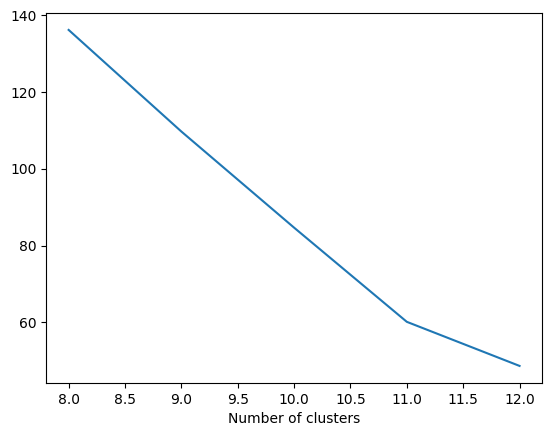

In [ ]:
# apple elbow method to find optimal number of clusters
#figure 3
plt.plot(range(8, 13), elbow)
plt.xlabel('Number of clusters')
plt.show()

## Interpretation of results and visualizations

dendrogram for technical skills

<ipython-input-196-f8ef39956969>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D)


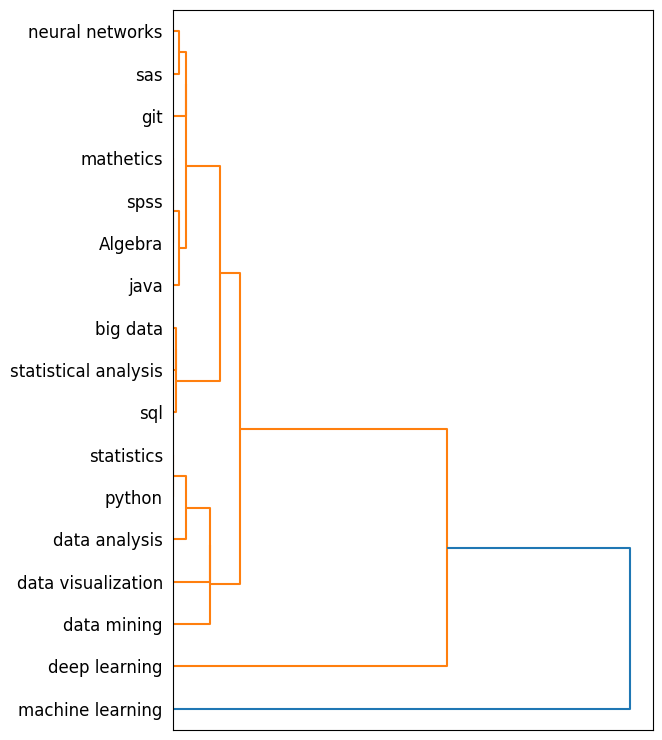

In [ ]:
# technical skills
Y = sch.linkage(D)
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

Z1 = dendrogram(Y, orientation='right')
labels = techdf.columns.values[Z1['leaves']]
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.show()


dendrogram for soft skills

<ipython-input-239-0ad3d6f401dc>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y_soft = sch.linkage(D_soft)


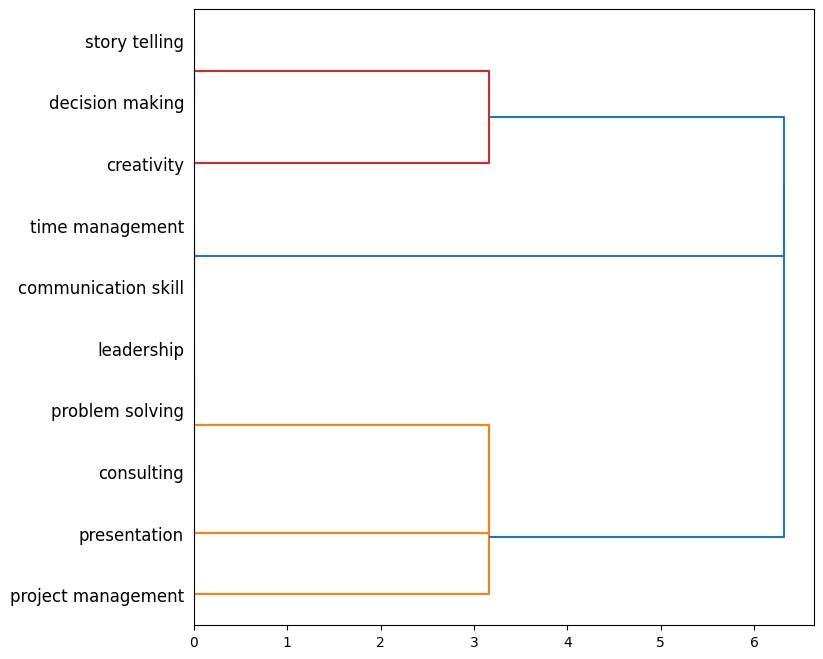

In [ ]:
# soft skills
Y_soft = sch.linkage(D_soft)
fig, ax = plt.subplots(1,1, figsize=(8, 8))

Z2 = dendrogram(Y_soft, orientation='right')
labels_soft = softdf.columns.values[Z2['leaves']]
ax.set_yticklabels(labels_soft)
plt.show()

dendrogram for all skills

<ipython-input-240-457d5d3115f3>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y_all = sch.linkage(D_all)


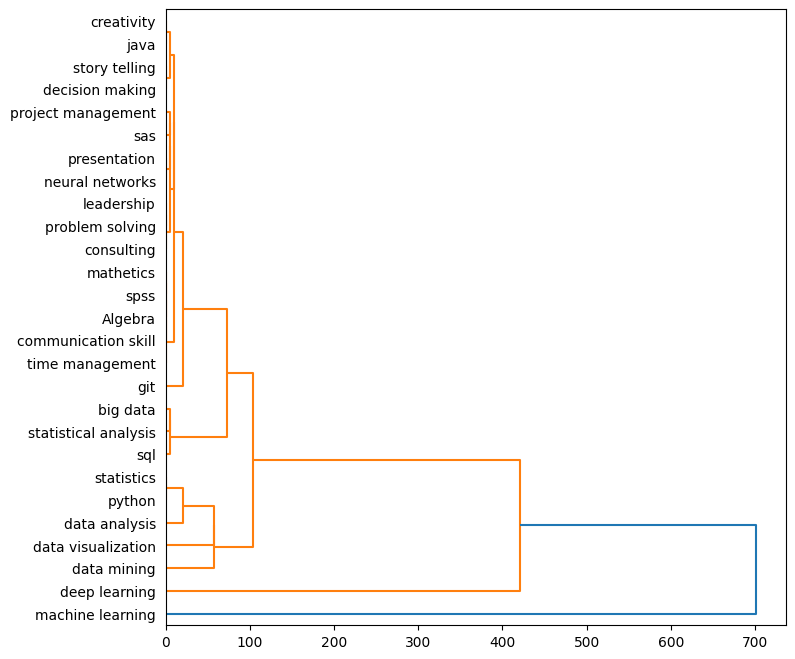

In [ ]:
# all skills
Y_all = sch.linkage(D_all)
fig, ax = plt.subplots(1,1, figsize=(8, 8))

Z3 = dendrogram(Y_all, orientation='right')
labels_all = alldf.columns.values[Z3['leaves']]
ax.set_yticklabels(labels_all)
plt.show()

According to figure 3, the elbow method showed that the slope of the trend changed significantly at the number of clusters of 11. Hence we will implement k-means with 11 clusters.

Then we applied PCA visualization. PCA is a dimensionality reduction technique which will allow us to plot the results in 2D.

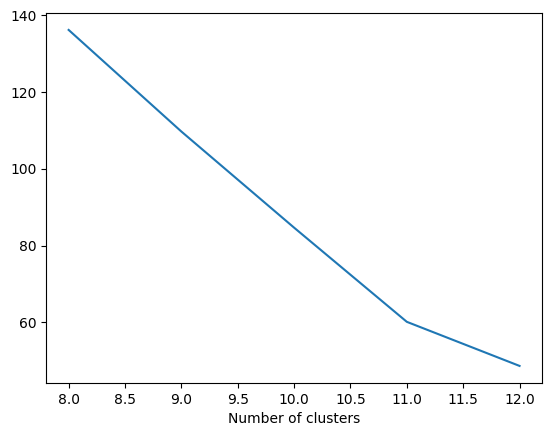

In [ ]:
plt.plot(range(8, 13), elbow)
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
X_reduced = PCA(2).fit_transform(X)

model1 = KMeans(n_clusters=11)
km_pred = model1.fit_predict(X_reduced)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


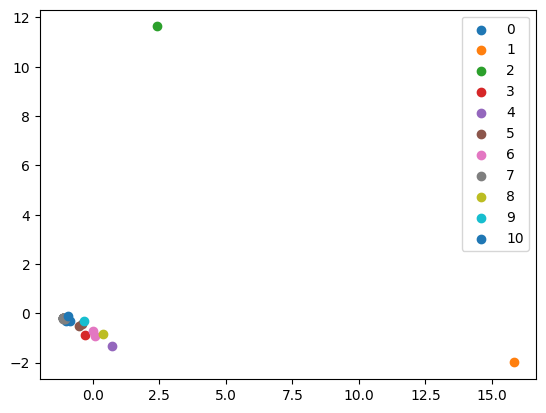

In [ ]:
labels = np.unique(km_pred)
for i in labels:
  plt.scatter(X_reduced[km_pred == i,0], X_reduced[km_pred == i,1], label = i)
plt.legend()
plt.show()


## Discussion and final course curriculum

Based on the scatter plot from k-means clustering, we could find that almost all the course are relevant to technical skills, but only one course about soft skills. From the previous analysis, the most high-rating companies are more likely matching students with excellent "story telling" skills. However, based one the k-means clustering, students won't take the course contains such topic. However, students could take almost all the skills if designing from hierarchical clustering algorithm. This is because I manually separate the topic sets into technical and soft skills. However, based on the dendrogram of Figure 4, 5, 6, that most designed courses would contain more than or equal to 5 topics at the same time. This may add lots of pressure to students and have too much workloads. Therefore, from these 2 designs, I may choose the curriculum from hierarchical clustering algorithm rather than k-means clustering. But it would be better if we consider both clustering algorithms at the same time.

## OpenAI to describe clustering results

Based on the results of the k-means and hierarchical clustering algorithms, we can observe some common themes among the clusters. Here are some possible interpretations:

Cluster 0 (k-means) and Cluster 1 (hierarchical) both emphasize machine learning and related skills, such as deep learning and data visualization.

Cluster 2 (k-means) and Cluster 5 (hierarchical) both include data mining and data visualization as important skills.

Cluster 7 (k-means) and Cluster 1 (hierarchical) both include machine learning and programming skills like Python and SQL.

Cluster 3 (k-means) and Cluster 2 (hierarchical) both involve project management and consulting-related skills like leadership and decision making.

Cluster 8 (k-means) and Cluster 4 (hierarchical) both include statistics and programming skills, such as Python and SPSS.

Cluster 6 (k-means) and Cluster 7 (hierarchical) both involve communication-related skills like presentation and storytelling.

Cluster 9 (k-means) and Cluster 5 (hierarchical) both involve big data and statistics skills.

Overall, we can see that machine learning and related skills, as well as data mining and visualization, are commonly emphasized across the clusters. Additionally, programming skills such as Python and SQL are also frequently included. Communication and consulting-related skills also appear in several clusters, indicating the importance of these skills in data-related fields.